In [20]:
# Import functions
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from splinter import Browser
from bs4 import BeautifulSoup as bs
import pymongo
from webdriver_manager.chrome import ChromeDriverManager
import datetime
import requests
import re

In [21]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

In [22]:
# read url data in tables data frame
tables = pd.read_html(url)
tables

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [23]:
# store tables into df dataframe
df = tables[0]
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [24]:
df.count()

id                  1867
terrestrial_date    1867
sol                 1867
ls                  1867
month               1867
min_temp            1867
pressure            1867
dtype: int64

In [25]:
html_table = df.to_html()
html_table

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>id</th>\n      <th>terrestrial_date</th>\n      <th>sol</th>\n      <th>ls</th>\n      <th>month</th>\n      <th>min_temp</th>\n      <th>pressure</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>2</td>\n      <td>2012-08-16</td>\n      <td>10</td>\n      <td>155</td>\n      <td>6</td>\n      <td>-75.0</td>\n      <td>739.0</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>13</td>\n      <td>2012-08-17</td>\n      <td>11</td>\n      <td>156</td>\n      <td>6</td>\n      <td>-76.0</td>\n      <td>740.0</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>24</td>\n      <td>2012-08-18</td>\n      <td>12</td>\n      <td>156</td>\n      <td>6</td>\n      <td>-76.0</td>\n      <td>741.0</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>35</td>\n      <td>2012-08-19</td>\n      <td>13</td>\n      <td>157</td>\n      <td>6</td>\n      <td>-

In [26]:
# data types of data
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [29]:
df.month

0       6
1       6
2       6
3       6
4       6
       ..
1862    5
1863    5
1864    5
1865    5
1866    5
Name: month, Length: 1867, dtype: int64

In [30]:
sum(df.month)
# sum of the month is 11467

11467

In [31]:
# Find how many month exists on Mars
Months = df["month"]
Months.nunique()
# total months is 12

12

In [32]:
# find how many martian days worth of data exist in the scrapest dataset
days = len(df)
days
# total martian days are 1867

1867

In [33]:
# Find the coldest and warmest month on Mars
average_temprature=df.groupby(["month"]).mean()[["min_temp"]]
average_temprature.head(12)
# Month 3 is coldest temperature month on Mars
# month 8 is warmest temperature month on Mars

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


Text(0, 0.5, 'Average Temprature')

<Figure size 576x432 with 0 Axes>

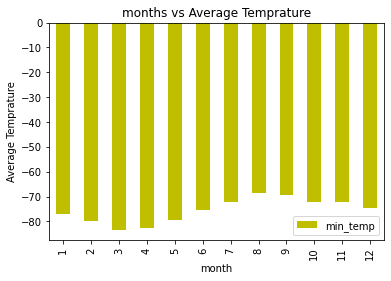

In [34]:
plt.figure(figsize=(8,6))
average_temprature.plot.bar(color=['y', 'b', 'g'])
plt.title("months vs Average Temprature")
plt.ylabel("Average Temprature")
# There is Lowest temperature on Mars in Month 3 with -83.307292
# There is Highest temperature on Mars in month 8 with -68.382979

In [35]:
# find Lowest and highest atmospheric pressure month on mars
average_pressure=df.groupby(["month"]).mean()[["pressure"]]
average_pressure.head(12)
# Month 6 is Lower pressure month on Mars
# month 9 is higher pressure month on Mars

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


Text(0, 0.5, 'Average Pressure')

<Figure size 576x432 with 0 Axes>

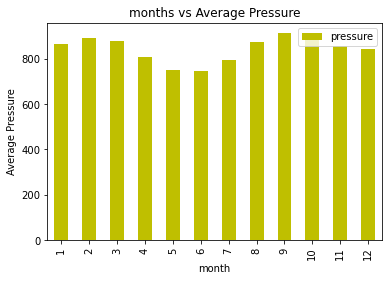

In [36]:
plt.figure(figsize=(8,6))
average_pressure.plot.bar(color=['y', 'b', 'g'])
plt.title("months vs Average Pressure")
plt.ylabel("Average Pressure")
#There is Lowest pressure on Mars in Month 6 with 745.054422 
#There is Highest pressure on Marsin month 9 with 913.305970

In [45]:
min_temprature_days=df.groupby(["terrestrial_date"]).mean()[["min_temp"]]
min_tempra=min_temprature_days.sort_values("min_temp",ascending=False)
min_tempra.head(12)

,min_temp
terrestrial_date,
2017-05-10,-62.0
2015-06-20,-63.0
2013-01-09,-63.0
2012-12-31,-63.0
2012-11-26,-64.0
2013-01-21,-64.0
2013-01-14,-64.0
2013-01-12,-64.0
2013-01-07,-64.0


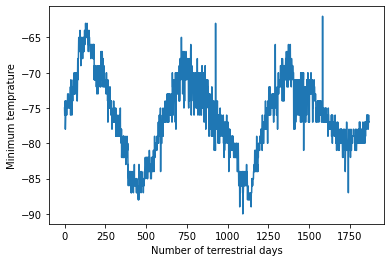

In [46]:
df.min_temp.plot()
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temprature')
plt.show()

In [48]:
# export dataframe to csv file
df.to_csv("output/assign.csv", index=False,header=True)